In [1]:
# imports
from CLEAN3 import doCLEAN,gauss2D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# preparing support size
imsize=256
img=np.array((imsize,imsize))

In [3]:
# preparing gridding
x=np.arange(0,imsize)-imsize//2
y=np.arange(0,imsize)-imsize//2
xx,yy=np.meshgrid(x,y)

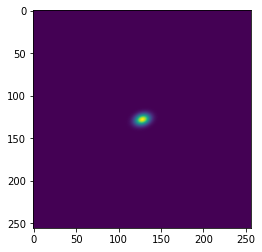

In [4]:
# PSF
PSF=gauss2D(xx,yy,1,0,0,5,5,0.3,-0.2)  # gridx, gridy, amp, meanx, meany, stdx, stdy, e1, e2

plt.imshow(PSF)

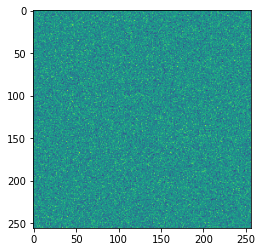

In [5]:
# preparing background noise
sigma=30
noise=np.random.randn(256,256)*sigma

plt.imshow(noise)

In [6]:
# Preparing sky parameters
Nsrc=5   # number of sources
pad=20.  # avoid putting sources too close 
MaxFluxdensity=1e3   #  max flux 

stdx=5.   # width of sources
stdy=5.   # width of sources
meanx=np.random.randint(-imsize//2+pad,imsize//2-pad,size=Nsrc)  # random location of sources in x
meany=np.random.randint(-imsize//2+pad,imsize//2-pad,size=Nsrc)  # random location of sources in y
Amp=np.random.rand(Nsrc)*MaxFluxdensity # random flux density
e1,e2= 0.5 * np.random.randn(2) - 0.25

Text(0, 0.5, 'y')

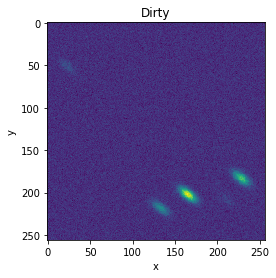

In [7]:
# Creating sky
dirty=np.zeros((imsize,imsize))
for isrc in np.arange(Nsrc):
    tmpg=gauss2D(xx,yy,Amp[isrc],meanx[isrc],meany[isrc],stdx,stdy,e1,e2)
    dirty=dirty+tmpg  # feeling dirty

dirty=dirty+noise # adding noise background
plt.imshow(dirty, interpolation='none')
plt.title('Dirty')
plt.xlabel('x')
plt.ylabel('y')

/opt/anaconda3/envs/galsim/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 4.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 6.000e+00, 2.000e+00, 6.000e+00, 3.000e+00,
        1.100e+01, 5.000e+00, 8.000e+00, 6.000e+00, 1.400e+01, 1.200e+01,
        1.600e+01, 2.100e+01, 2.300e+01, 2.500e+01, 2.800e+01, 2.500e+01,
        3.000e+01, 3.500e+01, 4.600e+01, 3.600e+01, 4.000e+01, 6.800e+01,
        6.800e+01, 9.700e+01, 6.600e+01, 8.300e+01, 1.050e+02, 1.180e+02,
        1.230e+02, 1.430e+02, 1.730e+02, 2.070e+02, 2.250e+02, 2.580e+02,
        2.700e+02, 3.080e+02, 3.850e+02, 4.020e+02, 4.510e+02, 5.280e+02,
        5.730e+02, 6.490e+02, 7.500e+02, 8.220e+02, 9.210e+02, 1.019e+03,
        1.153e+03, 1.289e+03, 1.378e+03, 1.593e+03, 1.670e+03, 1.815e+03,
        1.800e+03, 1.914e+03, 1.936e+03, 1.921e+03, 1.732e+03, 1.551e+03,
        1.323e+03, 1.014e+03, 7.320e+0

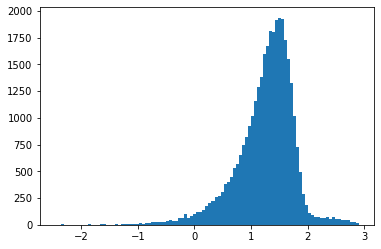

In [8]:
plt.hist(np.log10(dirty.flatten()),bins=101)

In [9]:
# running CLEAN
restored,restorednores,residual,skymodellist,skymodelimg=doCLEAN(dirty,PSF,gain=0.1,niter=5000,fthresh=3*sigma)

iter 0, (l,m):(202, 165), flux: 809.819231
iter 1, (l,m):(202, 165), flux: 728.837308
iter 2, (l,m):(202, 165), flux: 655.953577
iter 3, (l,m):(202, 165), flux: 590.358219
iter 4, (l,m):(184, 228), flux: 578.269750
iter 5, (l,m):(202, 165), flux: 531.322397
iter 6, (l,m):(182, 227), flux: 522.730977
iter 7, (l,m):(205, 169), flux: 499.524345
iter 8, (l,m):(198, 161), flux: 475.152165
iter 9, (l,m):(184, 228), flux: 474.873584
iter 10, (l,m):(205, 169), flux: 446.351206
iter 11, (l,m):(186, 231), flux: 429.910526
iter 12, (l,m):(198, 161), flux: 424.611465
iter 13, (l,m):(182, 227), flux: 409.525974
iter 14, (l,m):(205, 169), flux: 398.837959
iter 15, (l,m):(197, 158), flux: 386.556404
iter 16, (l,m):(218, 133), flux: 379.371878
iter 17, (l,m):(182, 227), flux: 368.573377
iter 18, (l,m):(205, 169), flux: 358.364119
iter 19, (l,m):(186, 231), flux: 351.563437
iter 20, (l,m):(197, 158), flux: 347.353750
iter 21, (l,m):(218, 133), flux: 341.434688
iter 22, (l,m):(202, 164), flux: 330.51564

Text(0, 0.5, 'y')

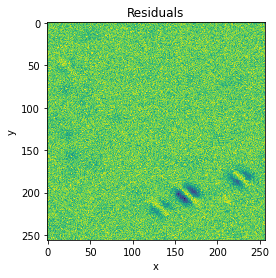

In [10]:
plt.imshow(residual, interpolation='none')
plt.title('Residuals')
plt.xlabel('x')
plt.ylabel('y')

/opt/anaconda3/envs/galsim/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 6.000e+00, 7.000e+00, 1.400e+01, 2.800e+01,
        3.500e+01, 5.100e+01, 7.500e+01, 8.900e+01, 1.120e+02, 2.310e+02,
        2.490e+02, 4.080e+02, 5.380e+02, 8.490e+02, 1.197e+03, 1.646e+03,
        2.369e+03, 3.327e+03, 4.327e+03, 4.999e+03, 4.940e+03, 3.204e+03,
        1.096e+03]),
 array([-3.03696641, -2.87596133, -2.71495624, -2.55395115, -2.39294606,
        -2.23194097, -2.07093588, -1.9099308 , -1.74892571, -1.58792062,
        -1.42691553, -1.26591044, -1.10490536, -0.94390027, -0.78289518,
        -0.62189009, -0.460885  , -0.29987991, -0.13887483,  0.02213026,
         0.18313535,  0.34414044,  0.50514553,  0.66615062,  0.8271557 ,
         0.98816079,  1.14916588,  1.31017097,  1.47117606,  1.63218114,
         1.79318623,  1.95419132]),
 <BarContainer object of 31 artists>)

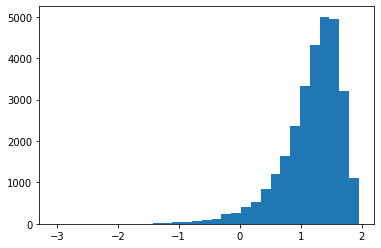

In [11]:
plt.hist(np.log10(residual.flatten()),bins=31)

Text(0, 0.5, 'y')

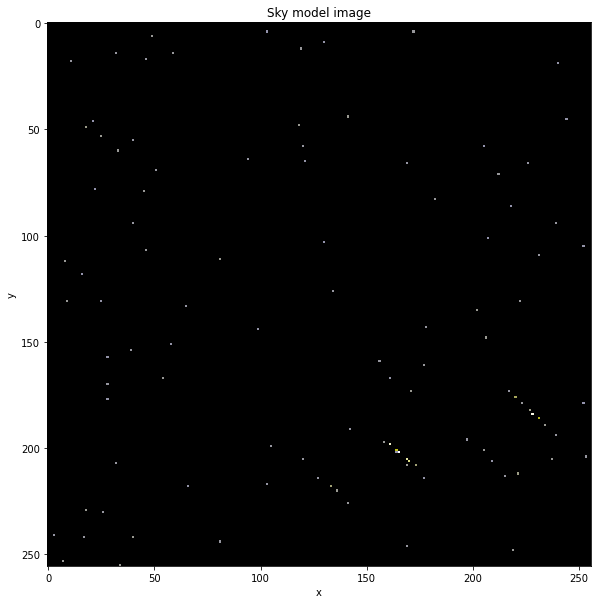

In [12]:
f=plt.figure(figsize=(10,10))
plt.imshow(np.log10(np.abs(skymodelimg)+1), cmap='gist_stern',interpolation='none')
plt.title('Sky model image')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

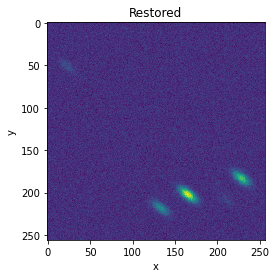

In [13]:
plt.imshow(restored, interpolation='none')
plt.title('Restored')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

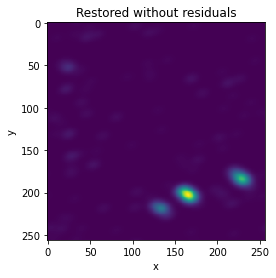

In [14]:
plt.imshow(restorednores, interpolation='none')
plt.title('Restored without residuals')
plt.xlabel('x')
plt.ylabel('y')